In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

%matplotlib inline
plt.rcParams.update({'font.size': 12})
n_jobs=-1 #number of threads

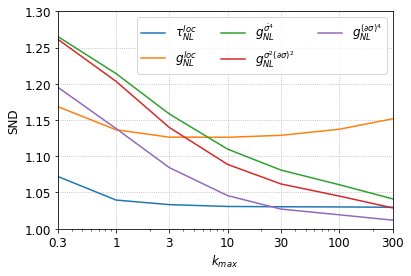

In [2]:
shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
primshapes = ["$\\tau_{NL}^{loc}$","$g_{NL}^{loc}$",'$g_{NL}^{\dot{\sigma}^4}$','$g_{NL}^{\sigma^2(\partial\sigma)^2}$','$g_{NL}^{(\partial \sigma)^4}$']
ks = [0.3,1,3,10,30,100,300]
b = 0
for shapy in shapes:
    Fish = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataPrim = np.genfromtxt(f"Secondaries7ks{shapy}.dat")

    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataPrim[a,-2]
                a+=1

    FishInv = np.linalg.inv(Fish)
    plt.semilogx(ks,np.sqrt(Fish[:,-1,-1]*FishInv[:,-1,-1]))
    
plt.grid(linestyle=":")
plt.legend(primshapes,ncol=3)
plt.xlabel("$k_{max}$")
plt.ylabel("SND")
plt.ylim(1,1.3)
plt.xlim(0.3,300)
plt.xticks(ks,[str(k) for k in ks])
plt.savefig("SNDTrispectrumPrim.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

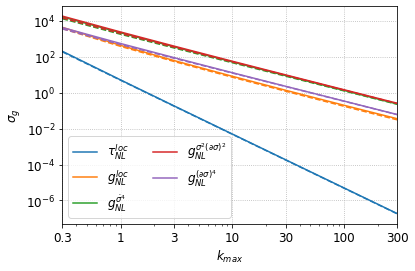

In [3]:
shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
primshapes = ["$\\tau_{NL}^{loc}$","$g_{NL}^{loc}$",'$g_{NL}^{\dot{\sigma}^4}$','$g_{NL}^{\sigma^2(\partial\sigma)^2}$','$g_{NL}^{(\partial \sigma)^4}$']
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]
ks = [0.3,1,3,10,30,100,300]

for shapi,shapy in enumerate(shapes):
    Fish = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataPrim = np.genfromtxt(f"Secondaries7ks{shapy}.dat")

    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataPrim[a,-2]
                a+=1

    FishInv = np.linalg.inv(Fish)
    plt.loglog(ks,FishInv[:,-1,-1]**(1/2),label=primshapes[shapi],color=colors[shapi])
    plt.loglog(ks,Fish[:,-1,-1]**(-1/2),"--",color=colors[shapi])
    
plt.grid(linestyle=":")
plt.legend(ncol=2)
plt.xlabel("$k_{max}$")
plt.ylabel("$\\sigma_g$")
plt.xlim(0.3,300)
plt.xticks(ks,[str(k) for k in ks])
plt.savefig("TrispectrumCommonError.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

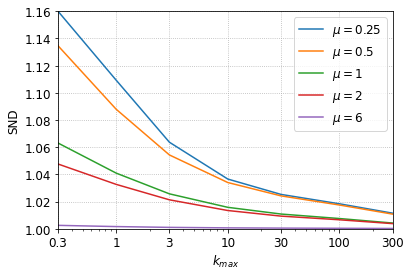

In [7]:
mus = [0.25,0.5,1,2,6]
ks = [0.3,1,3,10,30,100,300]
final_results = np.zeros((len(mus),7))
b = 0

for mu in mus:
    Fish = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataPrim = np.genfromtxt(f"Secondaries7ksTClock{mu}.dat")
    
    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataPrim[a,-2]
                a+=1

    FishInv = np.linalg.inv(Fish)
    plt.semilogx(ks,np.sqrt(Fish[:,-1,-1]*FishInv[:,-1,-1]),label=f"$\\mu = {mu}$")
    
plt.grid(linestyle=":")
plt.legend()
plt.xlabel("$k_{max}$")
plt.xlim(0.3,300)
plt.ylim(1,1.16)
plt.ylabel("SND")
plt.xticks(ks,[str(k) for k in ks])
plt.savefig("SNDTrispectrumClock.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

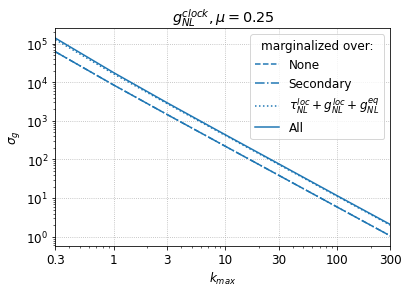

In [5]:
mus = [0.25]
ks = [0.3,1,3,10,30,100,300]
# shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
shapes = ["Teq1","Teq2","Teq3","TgNL","TtauNL"]
primshapes = ["$\\tau_{NL}^{loc}$","$g_{NL}^{loc}$",'$g_{NL}^{\dot{\sigma}^4}$','$g_{NL}^{\dot{\sigma}^2(\partial\sigma)^2}$','$g_{NL}^{(\partial \sigma)^4}$']
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

b=0
for mu in mus:
    Fish = np.zeros((len(ks),13,13))
    FishSecOnly = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataSecClock = np.genfromtxt(f"Secondaries7ksTClock{mu}.dat")
    dataPrim = np.genfromtxt("PrimOverlaps7ks.dat")
    dataPrimClock = np.genfromtxt(f"PrimClockOverlaps7ks{mu}.dat")

    #fill the first 7x7 block with secondaries
    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1
                
    FishSecOnly[:,:-1,:-1] = Fish[:,:7,:7]
                
    #fill the prim x secondaries:
    for si, shape in enumerate(shapes):
        dataSecPrim = np.genfromtxt(f"Secondaries7ks{shape}.dat")
        a = 0
        for ki in range(len(ks)):
            for S1 in range(8):
                if S1 == 7:
                    Fish[ki,7+si,7+si] = dataSecPrim[a,-2]
                else:
                    Fish[ki,S1,7+si] = Fish[ki,7+si,S1] = dataSecPrim[a,-2]
                a+=1

    #fill the prim x prim block
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            for S2 in range(S1,5):
                if S1 == S2:
                    sadslkfjsdf = 1
                else:
                    Fish[ki,7+S1,7+S2] = Fish[ki,7+S2,7+S1] = dataPrim[a,-2]
                a+=1

    #fill the sec x clock row&column

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
            if S1 == 7:
                Fish[ki,-1,-1] = dataSecClock[a,-2]
            else:
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataSecClock[a,-2]
            a+=1
            
    #fill the prim x clock parts
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            Fish[ki,7+S1,-1] = Fish[ki,-1,7+S1] = dataPrimClock[a,-2]
            a+=1

    FishPrimOnly = Fish[:,8:,8:]
    FishSecOnly[:,-1,-1] = Fish[:,-1,-1]
            
    FishInv = np.linalg.inv(Fish)
    FishSecOnlyInv = np.linalg.inv(FishSecOnly)
    FishPrimOnlyInv = np.linalg.inv(FishPrimOnly)
#     plt.loglog(ks,Fish[:,-1,-1]**(-1/2),"--",color=colors[b])
#     plt.loglog(ks,FishInv[:,-1,-1]**(1/2),linestyle="-",color=colors[b])
#     plt.loglog(ks,FishSecOnlyInv[:,-1,-1]**(1/2),"-.",color=colors[b])
#     plt.loglog(ks,FishPrimOnlyInv[:,-1,-1]**(1/2),":",color=colors[b])
    plt.loglog(ks,Fish[:,-1,-1]**(-1/2),"--",color=colors[b],label="None")
    plt.loglog(ks,FishSecOnlyInv[:,-1,-1]**(1/2),"-.",color=colors[b],label="Secondary")
    plt.loglog(ks,FishPrimOnlyInv[:,-1,-1]**(1/2),":",color=colors[b],label="$\\tau_{NL}^{loc}+g_{NL}^{loc}+g_{NL}^{eq}$")
    plt.loglog(ks,FishInv[:,-1,-1]**(1/2),color=colors[b],label="All")

plt.xlim(0.3,300)
# plt.ylim(1e0,1e6)
plt.xticks(ks,[str(k) for k in ks])
plt.xlabel("$k_{max}$")
plt.ylabel("$\sigma_g$")
plt.title("$g_{NL}^{clock},\\mu = 0.25$")
plt.grid(linestyle=":")
plt.legend(title="marginalized over:")
plt.savefig("TrispectrumClock0.25Marginalised.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

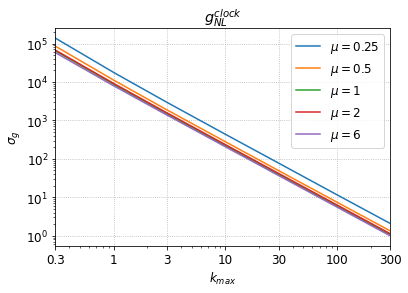

In [6]:
mus = [0.25,0.5,1,2,6]
ks = [0.3,1,3,10,30,100,300]
# shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
shapes = ["Teq1","Teq2","Teq3","TgNL","TtauNL"]
primshapes = ["$\\tau_{NL}^{loc}$","$g_{NL}^{loc}$",'$g_{NL}^{\dot{\sigma}^4}$','$g_{NL}^{\dot{\sigma}^2(\partial\sigma)^2}$','$g_{NL}^{(\partial \sigma)^4}$']
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

for mui, mu in enumerate(mus):
    Fish = np.zeros((len(ks),13,13))
    FishSecOnly = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataSecClock = np.genfromtxt(f"Secondaries7ksTClock{mu}.dat")
    dataPrim = np.genfromtxt("PrimOverlaps7ks.dat")
    dataPrimClock = np.genfromtxt(f"PrimClockOverlaps7ks{mu}.dat")

    #fill the first 7x7 block with secondaries
    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1
                
    FishSecOnly[:,:-1,:-1] = Fish[:,:7,:7]
                
    #fill the prim x secondaries:
    for si, shape in enumerate(shapes):
        dataSecPrim = np.genfromtxt(f"Secondaries7ks{shape}.dat")
        a = 0
        for ki in range(len(ks)):
            for S1 in range(8):
                if S1 == 7:
                    Fish[ki,7+si,7+si] = dataSecPrim[a,-2]
                else:
                    Fish[ki,S1,7+si] = Fish[ki,7+si,S1] = dataSecPrim[a,-2]
                a+=1

    #fill the prim x prim block
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            for S2 in range(S1,5):
                if S1 == S2:
                    sadslkfjsdf = 1
                else:
                    Fish[ki,7+S1,7+S2] = Fish[ki,7+S2,7+S1] = dataPrim[a,-2]
                a+=1

    #fill the sec x clock row&column

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
            if S1 == 7:
                Fish[ki,-1,-1] = dataSecClock[a,-2]
            else:
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataSecClock[a,-2]
            a+=1
            
    #fill the prim x clock parts
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            Fish[ki,7+S1,-1] = Fish[ki,-1,7+S1] = dataPrimClock[a,-2]
            a+=1

    FishPrimOnly = Fish[:,8:,8:]
    FishSecOnly[:,-1,-1] = Fish[:,-1,-1]
            
    FishInv = np.linalg.inv(Fish)
    FishSecOnlyInv = np.linalg.inv(FishSecOnly)
    FishPrimOnlyInv = np.linalg.inv(FishPrimOnly)
#     plt.loglog(ks,Fish[:,-1,-1]**(-1/2),"--",color=colors[b])
#     plt.loglog(ks,FishInv[:,-1,-1]**(1/2),linestyle="-",color=colors[b])
#     plt.loglog(ks,FishSecOnlyInv[:,-1,-1]**(1/2),"-.",color=colors[b])
#     plt.loglog(ks,FishPrimOnlyInv[:,-1,-1]**(1/2),":",color=colors[b])
#     plt.loglog(ks,Fish[:,-1,-1]**(-1/2),"--",color=colors[mui])
    plt.loglog(ks,FishInv[:,-1,-1]**(1/2),color=colors[mui],label=f"$\\mu = {mu}$")

plt.xlim(0.3,300)
# plt.ylim(1e0,1e6)
plt.xticks(ks,[str(k) for k in ks])
plt.xlabel("$k_{max}$")
plt.ylabel("$\sigma_g$")
plt.title("$g_{NL}^{clock}$")
plt.grid(linestyle=":")
plt.legend()
plt.savefig("TrispectrumClockError.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

## Intermediate Shape

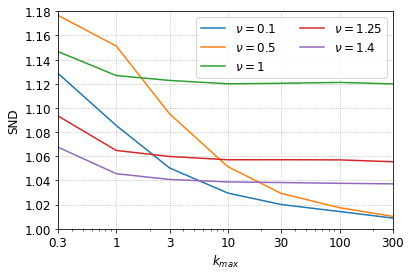

In [11]:
mus = [0.1,0.5,1,1.25,1.4]
ks = [0.3,1,3,10,30,100,300]

for mu in mus:
    Fish = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataPrim = np.genfromtxt(f"Secondaries7ksTInt{mu}.dat")

    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataPrim[a,-2]
                a+=1

    FishInv = np.linalg.inv(Fish)
    plt.semilogx(ks,np.sqrt(Fish[:,-1,-1]*FishInv[:,-1,-1]),label=f"$\\nu = {mu}$")
    
plt.grid(linestyle=":")
plt.legend(ncol=2)
plt.xlabel("$k_{max}$")
plt.ylabel("SND")
plt.xlim(0.3,300)
plt.ylim(1,1.18)
plt.xticks(ks[:],[str(k) for k in ks[:]])
plt.savefig("SNDTrispectrumInt.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

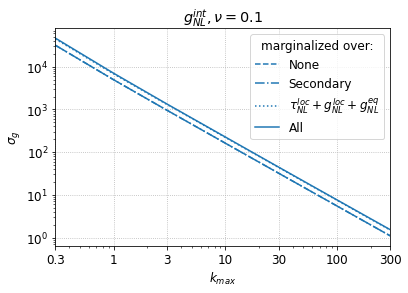

In [8]:
mus = [0.1]
ks = [0.3,1,3,10,30,100,300]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

# shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
shapes = ["Teq1","Teq2","Teq3","TgNL","TtauNL"]

colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

b=0
for mu in mus:
    Fish = np.zeros((len(ks),13,13))
    FishSecOnly = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataSecClock = np.genfromtxt(f"Secondaries7ksTInt{mu}.dat")
    dataPrim = np.genfromtxt("PrimOverlaps7ks.dat")
    dataPrimClock = np.genfromtxt(f"PrimIntOverlaps7ks{mu}.dat")

    #fill the first 7x7 block with secondaries
    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1
                
    FishSecOnly[:,:-1,:-1] = Fish[:,:7,:7]
                
    #fill the prim x secondaries:
    for si, shape in enumerate(shapes):
        dataSecPrim = np.genfromtxt(f"Secondaries7ks{shape}.dat")
        a = 0
        for ki in range(len(ks)):
            for S1 in range(8):
                if S1 == 7:
                    Fish[ki,7+si,7+si] = dataSecPrim[a,-2]
                else:
                    Fish[ki,S1,7+si] = Fish[ki,7+si,S1] = dataSecPrim[a,-2]
                a+=1

    #fill the prim x prim block
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            for S2 in range(S1,5):
                if S1 == S2:
                    sadslkfjsdf = 1
                else:
                    Fish[ki,7+S1,7+S2] = Fish[ki,7+S2,7+S1] = dataPrim[a,-2]
                a+=1

    #fill the sec x clock row&column

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
            if S1 == 7:
                Fish[ki,-1,-1] = dataSecClock[a,-2]
            else:
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataSecClock[a,-2]
            a+=1
            
    #fill the prim x clock parts
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            Fish[ki,7+S1,-1] = Fish[ki,-1,7+S1] = dataPrimClock[a,-2]
            a+=1

    FishPrimOnly = Fish[:,8:,8:]
    FishSecOnly[:,-1,-1] = Fish[:,-1,-1]
            
    FishInv = np.linalg.inv(Fish)
    FishSecOnlyInv = np.linalg.inv(FishSecOnly)
    FishPrimOnlyInv = np.linalg.inv(FishPrimOnly)
    plt.loglog(ks,Fish[:,-1,-1]**(-1/2),"--",color=colors[b],label="None")
    plt.loglog(ks,FishSecOnlyInv[:,-1,-1]**(1/2),"-.",color=colors[b],label="Secondary")
    plt.loglog(ks,FishPrimOnlyInv[:,-1,-1]**(1/2),":",color=colors[b],label="$\\tau_{NL}^{loc}+g_{NL}^{loc}+g_{NL}^{eq}$")
    plt.loglog(ks,FishInv[:,-1,-1]**(1/2),color=colors[b],label="All")

plt.xlim(0.3,300)
plt.xticks(ks,[str(k) for k in ks])
plt.xlabel("$k_{max}$")
plt.ylabel("$\sigma_g$")
plt.legend(title="marginalized over:")
plt.title("$g_{NL}^{int},\\nu=0.1$")
plt.grid(linestyle=":")
plt.savefig("TrispectrumInt0.1Marginalised.pdf",format='pdf',bbox_inches = 'tight')
plt.show()

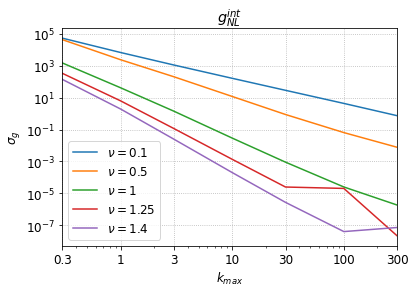

In [10]:
mus = [0.1,0.5,1,1.25,1.4]
ks = [0.3,1,3,10,30,100,300]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]


for mui,mu in enumerate(mus):
    Fish = np.zeros((len(ks),13,13))
    FishSecOnly = np.zeros((len(ks),8,8))
    dataSec = np.genfromtxt("Secondaries7ksALTSymmetry.dat")
    dataSecClock = np.genfromtxt(f"Secondaries7ksTInt{mu}.dat")
    dataPrim = np.genfromtxt("PrimOverlaps7ks.dat")
    dataPrimClock = np.genfromtxt(f"PrimIntOverlaps7ks{mu}.dat")

    #fill the first 7x7 block with secondaries
    a = 0
    for ki in range(len(ks)):
        for S1 in range(7):
            for S2 in range(S1,7):
                Fish[ki,S1,S2] = Fish[ki,S2,S1] = dataSec[a,-2]
                a+=1
                
    FishSecOnly[:,:-1,:-1] = Fish[:,:7,:7]
                
    #fill the prim x secondaries:
    for si, shape in enumerate(shapes):
        dataSecPrim = np.genfromtxt(f"Secondaries7ks{shape}.dat")
        a = 0
        for ki in range(len(ks)):
            for S1 in range(8):
                if S1 == 7:
                    Fish[ki,7+si,7+si] = dataSecPrim[a,-2]
                else:
                    Fish[ki,S1,7+si] = Fish[ki,7+si,S1] = dataSecPrim[a,-2]
                a+=1

    #fill the prim x prim block
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            for S2 in range(S1,5):
                if S1 == S2:
                    sadslkfjsdf = 1
                else:
                    Fish[ki,7+S1,7+S2] = Fish[ki,7+S2,7+S1] = dataPrim[a,-2]
                a+=1

    #fill the sec x clock row&column

    a = 0
    for ki in range(len(ks)):
        for S1 in range(8):
            if S1 == 7:
                Fish[ki,-1,-1] = dataSecClock[a,-2]
            else:
                Fish[ki,S1,-1] = Fish[ki,-1,S1] = dataSecClock[a,-2]
            a+=1
            
    #fill the prim x clock parts
    a = 0
    for ki in range(len(ks)):
        for S1 in range(5):
            Fish[ki,7+S1,-1] = Fish[ki,-1,7+S1] = dataPrimClock[a,-2]
            a+=1
            
    FishInv = np.linalg.inv(Fish)
    plt.loglog(ks,FishInv[:,-1,-1]**(1/2),color=colors[mui],label=f"$\\nu = {mu}$")

plt.xlim(0.3,300)
plt.xticks(ks,[str(k) for k in ks])
plt.xlabel("$k_{max}$")
plt.ylabel("$\sigma_g$")
plt.legend()
plt.title("$g_{NL}^{int}$")
plt.grid(linestyle=":")
plt.savefig("TrispectrumIntError.pdf",format='pdf',bbox_inches = 'tight')
plt.show()